# Performance comparison

## Lists
Check if an element is present in a list


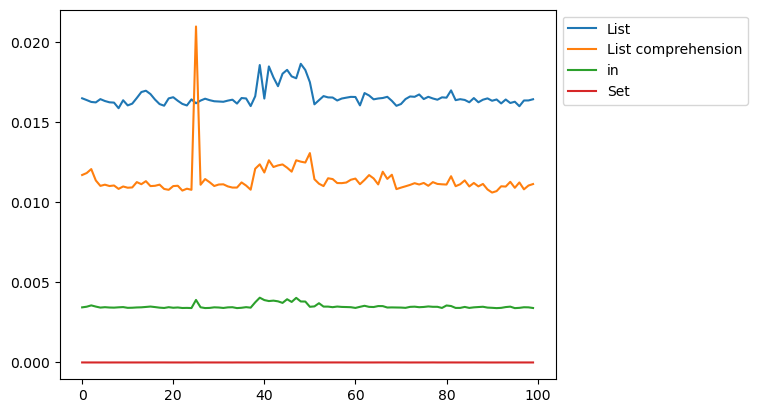

Average times:
For Loop: 0.016582 seconds
List Comprehension: 0.011406 seconds
in: 0.003506 seconds
Set: 0.000001 seconds


In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt


# Create a large list
lst = list(range(10**6))
target = 999999  # Last element (worst case)

# Convert list to set 
s = set(lst) 

for_loop_times = []
list_comrehension_times = []
in_times = []
set_times = []

repeats = 100

for _ in range(repeats):
    # For loop
    start = time.time()
    for x in lst:
        if x == target:
            break
    for_loop_times.append(time.time() - start)

    # List comprehension
    start = time.time()
    if target in [x for x in lst]:
        pass
    list_comrehension_times.append(time.time() - start)

    # in
    start = time.time()
    if target in lst:
        pass
    in_times.append(time.time() - start)

    # Set
    start = time.time()
    if target in s:
        pass
    set_times.append(time.time() - start)

# Plot
plt.plot(for_loop_times, label='List')
plt.plot(list_comrehension_times, label='List comprehension')
plt.plot(in_times, label='in')
plt.plot(set_times, label='Set')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

print('Average times:')
print(f"For Loop: {np.mean(for_loop_times):.6f} seconds")
print(f"List Comprehension: {np.mean(list_comrehension_times):.6f} seconds")
print(f"in: {np.mean(in_times):.6f} seconds")
print(f"Set: {np.mean(set_times):.6f} seconds")



Check if elements are larger than a threshold

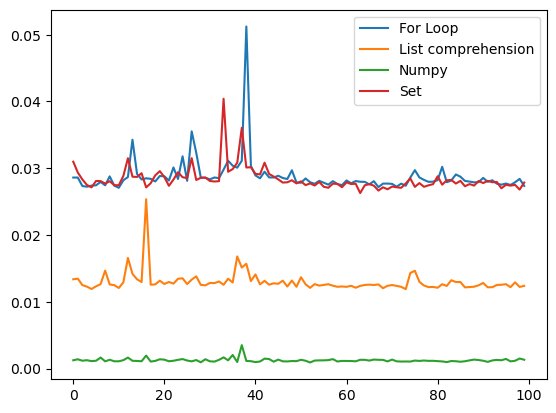

Average times:
For Loop: 0.028759 seconds
List Comprehension: 0.012982 seconds
Numpy: 0.001239 seconds
Set: 0.028342 seconds


In [2]:
for_loop_times = []
list_comrehension_times = []
numpy_times = []
set_times = []

repeats = 100

lst = list(range(10**6))
arr = np.array(lst)

# check if all elements are larger than a threshold value and save them in a new list

threshold = 10**5

for _ in range(repeats):
    # For loop
    start = time.time()
    new_lst = []
    for x in lst:
        if x > threshold:
            new_lst.append(x)
    for_loop_times.append(time.time() - start)

    # List comprehension
    start = time.time()
    new_lst = [x for x in lst if x > threshold]
    list_comrehension_times.append(time.time() - start)

    # Numpy
    start = time.time()
    new_arr = arr[arr > threshold]
    numpy_times.append(time.time() - start)

    # Set
    start = time.time()
    new_set = set(x for x in lst if x > threshold)
    set_times.append(time.time() - start)


# Plot
plt.plot(for_loop_times, label='For Loop')
plt.plot(list_comrehension_times, label='List comprehension')
plt.plot(numpy_times, label='Numpy')
plt.plot(set_times, label='Set')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

print('Average times:')
print(f"For Loop: {np.mean(for_loop_times):.6f} seconds")
print(f"List Comprehension: {np.mean(list_comrehension_times):.6f} seconds")
print(f"Numpy: {np.mean(numpy_times):.6f} seconds")
print(f"Set: {np.mean(set_times):.6f} seconds")


- NumPy is the fastest due to its C-based optimizations.

## Pandas data frame: calculations on rows

In [3]:
import pandas as pd
import numpy as np

# Number of genes
num_genes = 100

# Generate random sample sites
sample_sites = ["Tissue A", "Tissue B", "Tissue C", "Tissue D"]

# Generate random data
data = {
    "Gene": [f"Gene_{i+1}" for i in range(num_genes)], # Gene names: Gene_1, Gene_2, ...
    "Sample Site": np.random.choice(sample_sites, num_genes), # Sample site for each gene: random choice from sample_sites
    "Expression Before": np.random.uniform(10, 1000, num_genes), # Expression levels: random values between 10 and 1000
    "Expression After": np.random.uniform(10, 1000, num_genes) # Expression levels: random values between 10 and 1000
}

# Convert to DataFrame
expression_df = pd.DataFrame(data)

# Display the first few rows
expression_df.tail()


,Gene,Sample Site,Expression Before,Expression After
95,Gene_96,Tissue A,907.737107,545.786179
96,Gene_97,Tissue C,699.473063,767.575809
97,Gene_98,Tissue D,77.465566,807.052854
98,Gene_99,Tissue B,500.302019,30.064480
99,Gene_100,Tissue D,974.083139,469.145983


Calculating the fold change

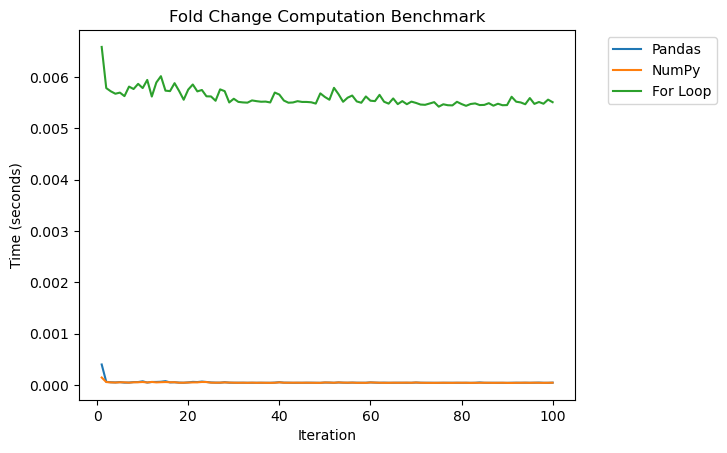

Mean time taken by each method:
Pandas: 0.000049 seconds
NumPy: 0.000046 seconds
For Loop: 0.005594 seconds


,Gene,Sample Site,Expression Before,Expression After,Fold Change_pandas,Fold Change_numpy,Fold Change_for_loop
0,Gene_1,Tissue B,370.513946,991.620589,2.676338,2.676338,2.676338
1,Gene_2,Tissue A,683.335330,754.462250,1.104088,1.104088,1.104088
2,Gene_3,Tissue A,980.406659,348.791339,0.355762,0.355762,0.355762
3,Gene_4,Tissue C,311.836681,302.695130,0.970685,0.970685,0.970685
4,Gene_5,Tissue C,416.883619,594.235103,1.425422,1.425422,1.425422


In [4]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pandas_times = []
numpy_times = []
for_loop_times = []

repeats = 100

for _ in range(repeats):
    # Compute fold change using pandas
    start = time.time()
    expression_df["Fold Change_pandas"] = expression_df["Expression After"] / expression_df["Expression Before"]
    pandas_times.append(time.time() - start)

    # Compute fold change using NumPy
    start = time.time()
    expression_df["Fold Change_numpy"] = np.divide(expression_df["Expression After"], expression_df["Expression Before"])
    numpy_times.append(time.time() - start)

    # Compute fold change using for loop
    start = time.time()
    expression_df["Fold Change_for_loop"] = float(0)
    for i in range(len(expression_df)):
        expression_df.loc[i, "Fold Change_for_loop"] = expression_df.loc[i, "Expression After"] / expression_df.loc[i, "Expression Before"]
    for_loop_times.append(time.time() - start)


# Plot results
plt.plot(range(1, repeats+1), pandas_times, label='Pandas')
plt.plot(range(1, repeats+1), numpy_times, label='NumPy')
plt.plot(range(1, repeats+1), for_loop_times, label='For Loop')
plt.xlabel('Iteration')
plt.ylabel('Time (seconds)')
plt.title('Fold Change Computation Benchmark')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

# Print the mean time taken by each method
print("Mean time taken by each method:")
print(f"Pandas: {np.mean(pandas_times):.6f} seconds")
print(f"NumPy: {np.mean(numpy_times):.6f} seconds")
print(f"For Loop: {np.mean(for_loop_times):.6f} seconds")


# Display the first few rows
expression_df.head()

Checking if the p-value is significant (<0.05) 

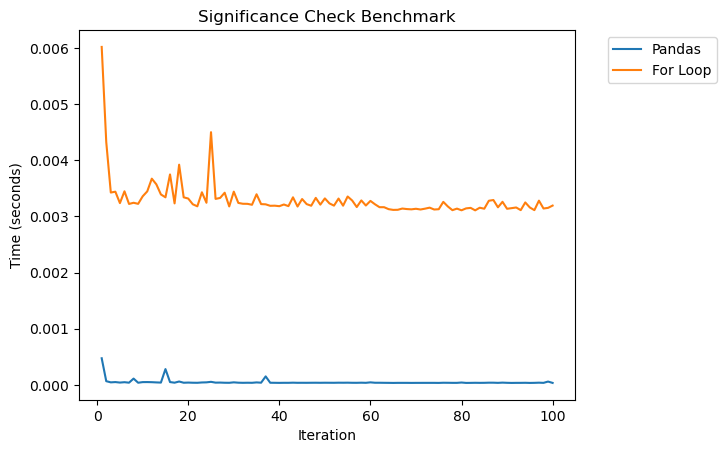

Mean time taken by each method:
Pandas: 0.000047 seconds
For Loop: 0.003298 seconds


,Gene,Sample Site,Expression Before,Expression After,Fold Change_pandas,Fold Change_numpy,Fold Change_for_loop,p-value,Significant_for_loop,Significant_pandas
0,Gene_1,Tissue B,370.513946,991.620589,2.676338,2.676338,2.676338,0.075211,False,False
1,Gene_2,Tissue A,683.335330,754.462250,1.104088,1.104088,1.104088,0.055442,False,False
2,Gene_3,Tissue A,980.406659,348.791339,0.355762,0.355762,0.355762,0.030529,True,True
3,Gene_4,Tissue C,311.836681,302.695130,0.970685,0.970685,0.970685,0.011218,True,True
4,Gene_5,Tissue C,416.883619,594.235103,1.425422,1.425422,1.425422,0.069684,False,False


In [5]:
pandas_times = []
for_loop_times = []

repeats = 100

# Add a p-value column
expression_df["p-value"] = np.random.uniform(0.0001, 0.08, len(expression_df))

for _ in range(repeats):
    # Check if p-value is significant using the for loop
    start = time.time()
    expression_df["Significant_for_loop"] = False
    for i in range(len(expression_df)):
        if expression_df.loc[i, "p-value"] < 0.05:
            expression_df.loc[i, "Significant_for_loop"] = True
    for_loop_times.append(time.time() - start)

    # Check if p-value is significant using pandas
    start = time.time()
    expression_df["Significant_pandas"] = expression_df["p-value"] < 0.05
    pandas_times.append(time.time() - start)

# Plot results
plt.plot(range(1, repeats+1), pandas_times, label='Pandas')
plt.plot(range(1, repeats+1), for_loop_times, label='For Loop')
plt.xlabel('Iteration')
plt.ylabel('Time (seconds)')
plt.title('Significance Check Benchmark')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

# Print the mean time taken by each method
print("Mean time taken by each method:")
print(f"Pandas: {np.mean(pandas_times):.6f} seconds")
print(f"For Loop: {np.mean(for_loop_times):.6f} seconds")

# Show the first few rows
expression_df.head()
